In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [3]:
Data = pd.read_csv("C:\\Users\\ganes\\OneDrive\\Desktop\\projects\\netflix_titles.csv")


In [4]:
print(Data)

     show_id     type                  title         director  \
0         s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1         s2  TV Show          Blood & Water              NaN   
2         s3  TV Show              Ganglands  Julien Leclercq   
3         s4  TV Show  Jailbirds New Orleans              NaN   
4         s5  TV Show           Kota Factory              NaN   
...      ...      ...                    ...              ...   
8802   s8803    Movie                 Zodiac    David Fincher   
8803   s8804  TV Show            Zombie Dumb              NaN   
8804   s8805    Movie             Zombieland  Ruben Fleischer   
8805   s8806    Movie                   Zoom     Peter Hewitt   
8806   s8807    Movie                 Zubaan      Mozez Singh   

                                                   cast        country  \
0                                                   NaN  United States   
1     Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa 

In [5]:
Data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,25-Sep-21,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,24-Sep-21,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,24-Sep-21,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,24-Sep-21,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,24-Sep-21,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [6]:
Data.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [7]:
Data.shape

(8807, 12)

In [9]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [29]:
Data.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

In [10]:
Data.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [13]:
(Data.isnull().sum().sum()/(Data.shape[0]*Data.shape[1]))*100

4.075356723818175

In [15]:
Data.columns


Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

# Data Cleaning

In [17]:
Data.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [19]:
# Get the uniqe vales

Data.nunique()

show_id         8807
type               2
title           8804
director        4528
cast            7692
country          748
date_added      1767
release_year      74
rating            17
duration         220
listed_in        514
description     8775
dtype: int64

In [31]:
Data["rating"].value_counts

<bound method IndexOpsMixin.value_counts of 0       PG-13
1       TV-MA
2       TV-MA
3       TV-MA
4       TV-MA
        ...  
8802        R
8803    TV-Y7
8804        R
8805       PG
8806    TV-14
Name: rating, Length: 8807, dtype: object>

In [32]:
# Handling missing values:

# rating

Data["rating"].fillna("TV-MA",inplace=True)

In [33]:
Data["director"].value_counts

<bound method IndexOpsMixin.value_counts of 0       Kirsten Johnson
1                   NaN
2       Julien Leclercq
3                   NaN
4                   NaN
             ...       
8802      David Fincher
8803                NaN
8804    Ruben Fleischer
8805       Peter Hewitt
8806        Mozez Singh
Name: director, Length: 8807, dtype: object>

In [34]:
# maximum values are missing in director column so we will fill that values with unknown

#director


Data['director'].fillna('unknown',inplace=True)

In [35]:
# cast
Data['cast'].value_counts

<bound method IndexOpsMixin.value_counts of 0                                                     NaN
1       Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...
2       Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...
3                                                     NaN
4       Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...
                              ...                        
8802    Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...
8803                                                  NaN
8804    Jesse Eisenberg, Woody Harrelson, Emma Stone, ...
8805    Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...
8806    Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...
Name: cast, Length: 8807, dtype: object>

In [36]:
Data['cast'].fillna("unknown",inplace=True)

In [38]:
Data['country'].value_counts

<bound method IndexOpsMixin.value_counts of 0       United States
1        South Africa
2                 NaN
3                 NaN
4               India
            ...      
8802    United States
8803              NaN
8804    United States
8805    United States
8806            India
Name: country, Length: 8807, dtype: object>

In [39]:
Data['country'].fillna(Data['country'].mode()[0],inplace=True)

In [40]:
Data['date_added'].isnull().sum()

10

In [41]:
Data['duration'].isnull().sum()

3

In [42]:
Data.dropna(subset=["date_added"],inplace=True)

In [43]:
Data.dropna(subset=["duration"],inplace=True)

In [44]:
# now chek onemore time null values

Data.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

# All missing values are cleared

In [45]:
Data.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

In [46]:
# Changing the Date datatype


Data["date_added"]=pd.to_datetime(Data["date_added"])

In [47]:
# Getting momth nasd year column fro data-added coulum for easy analysis of data

Data['month']=pd.to_numeric(Data['date_added'].dt.month,errors='coerce').astype('int64')

In [48]:
Data['year']=pd.to_numeric(Data['date_added'].dt.year,errors='coerce').astype('int64')

In [49]:
Data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,month,year
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,unknown,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",9,2021
1,s2,TV Show,Blood & Water,unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",9,2021
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",United States,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,9,2021
3,s4,TV Show,Jailbirds New Orleans,unknown,unknown,United States,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",9,2021
4,s5,TV Show,Kota Factory,unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,9,2021


In [50]:
# Changing the column name listed_in to genre

Data=Data.rename(columns={'listed_in':'genre'})

In [54]:
Data['genre']=Data['genre'].apply(lambda x:x.split(",")[0])

In [55]:
Data.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,genre,description,month,year
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,unknown,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",9,2021
1,s2,TV Show,Blood & Water,unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t...",9,2021
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",United States,2021-09-24,2021,TV-MA,1 Season,Crime TV Shows,To protect his family from a powerful drug lor...,9,2021
3,s4,TV Show,Jailbirds New Orleans,unknown,unknown,United States,2021-09-24,2021,TV-MA,1 Season,Docuseries,"Feuds, flirtations and toilet talk go down amo...",9,2021
4,s5,TV Show,Kota Factory,unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,International TV Shows,In a city of coaching centers known to train I...,9,2021


# EDA

# 1.Which year has the maximum number of realesed TV shows and Movies

In [56]:
tv_shows=Data[Data['type']=='TV Show']
movies=Data[Data['type']=='Movie']

Text(0, 0.5, 'year')

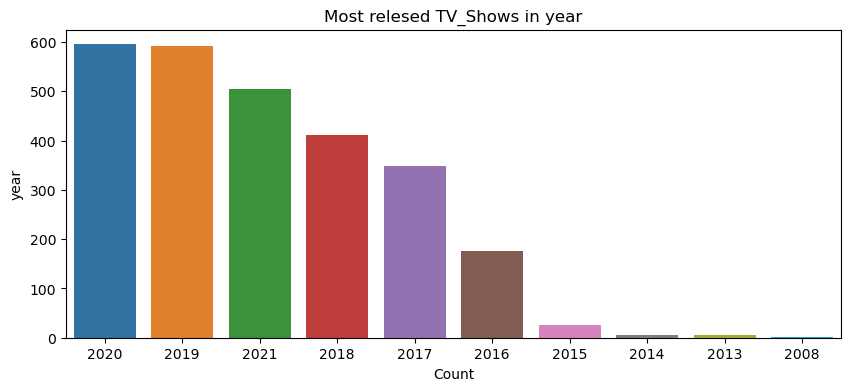

In [66]:
tv_shows['year'].value_counts()
plt.figure(figsize=(10,4))

sns.countplot(x ='year',data=tv_shows,order =tv_shows['year'].value_counts().index)
plt.title("Most relesed TV_Shows in year")
plt.xlabel("Count")
plt.ylabel("year")

Text(0, 0.5, 'year')

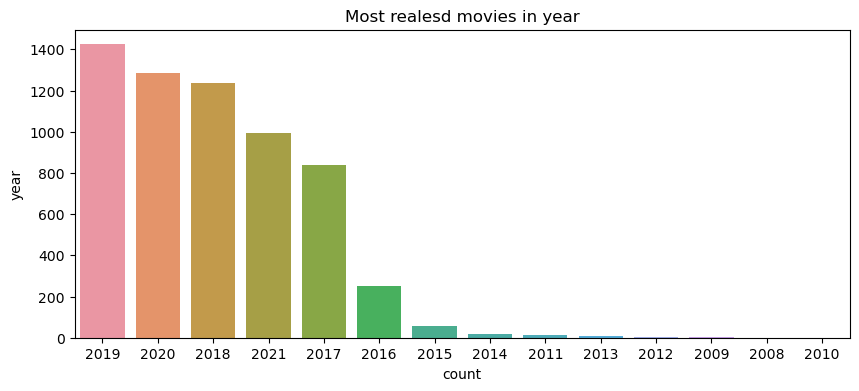

In [68]:
movies['year'].value_counts()
plt.figure(figsize=(10,4))

sns.countplot(x='year',data=movies,order = movies['year'].value_counts().index)
plt.title('Most realesd movies in year')
plt.xlabel('count')
plt.ylabel('year')

# 2.What is the distribution of content types(TVshows and movies)in the data set

In [71]:
Data['type'].value_counts()

type
Movie      6128
TV Show    2666
Name: count, dtype: int64

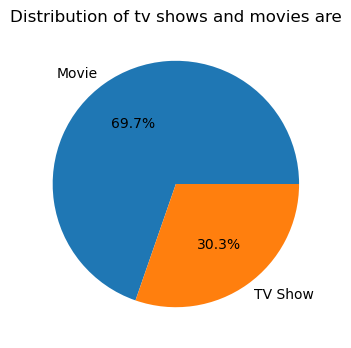

In [79]:
types=Data['type'].value_counts()
plt.figure(figsize=(6,4))
plt.pie(types.values,labels=Data['type'].value_counts().index ,autopct='%1.1f%%')
plt.title('Distribution of tv shows and movies are')
plt.show()

# 3.which countries have the highest number of content realese tv shows and movies?

Text(0, 0.5, 'count')

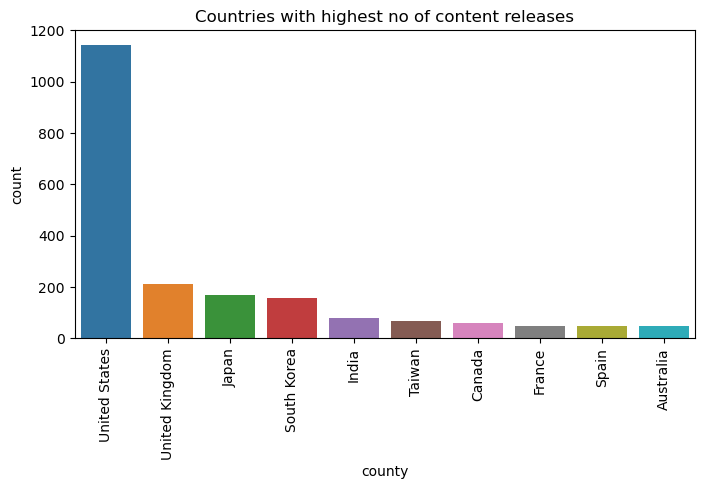

In [84]:
tv_shows['country'].value_counts()
plt.figure(figsize=(8,4))

sns.countplot(x='country',data=tv_shows,order= tv_shows['country'].value_counts().iloc[:10].index)
plt.xticks(rotation=90)
plt.title("Countries with highest no of content releases")
plt.xlabel("county")
plt.ylabel('count')

Text(0, 0.5, 'counts')

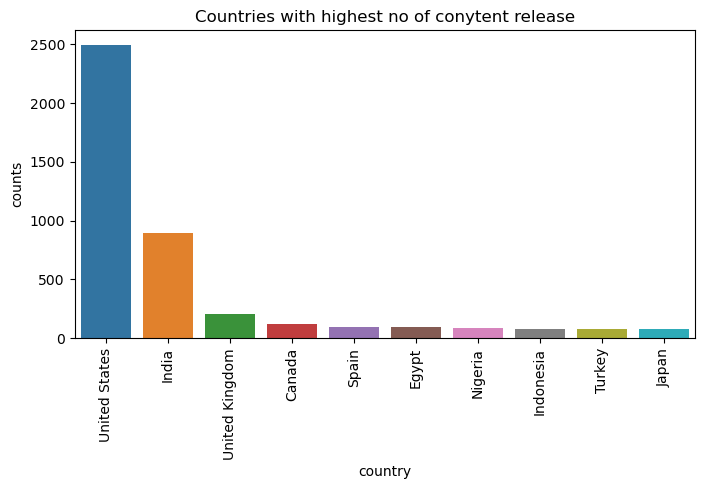

In [86]:
movies["country"].value_counts()
plt.figure(figsize=(8,4))
sns.countplot(x="country",data=movies,order=movies["country"].value_counts().iloc[:10].index)
plt.xticks(rotation=90)
plt.title("Countries with highest no of content release")
plt.xlabel('country')
plt.ylabel('counts')

# 4.What are the most common content ratings in data set?




Text(0, 0.5, 'count')

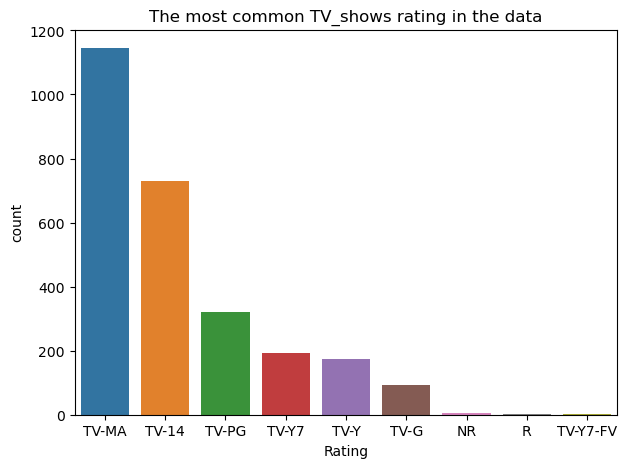

In [93]:
tv_shows['rating'].value_counts()
plt.figure(figsize=(7,5))
sns.countplot(x="rating",data=tv_shows,order=tv_shows['rating'].value_counts().index)
plt.title("The most common TV_shows rating in the data")
plt.xlabel('Rating')
plt.ylabel('count')

Text(0, 0.5, 'Counts')

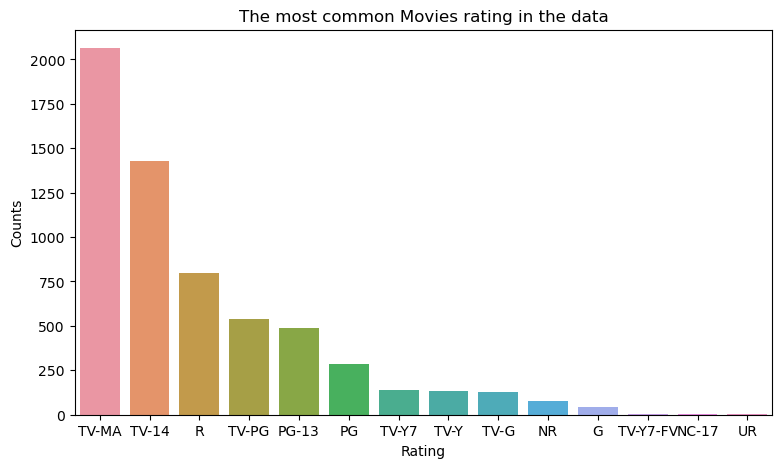

In [92]:
movies["rating"].value_counts()
plt.figure(figsize=(9,5))
sns.countplot(x='rating',data=movies,order=movies['rating'].value_counts().index)
plt.title("The most common Movies rating in the data")
plt.xlabel('Rating')
plt.ylabel('Counts')


# 5.Which genere are the most popular in terms of content type [TV_shows and Movies]

Text(0, 0.5, 'Counts')

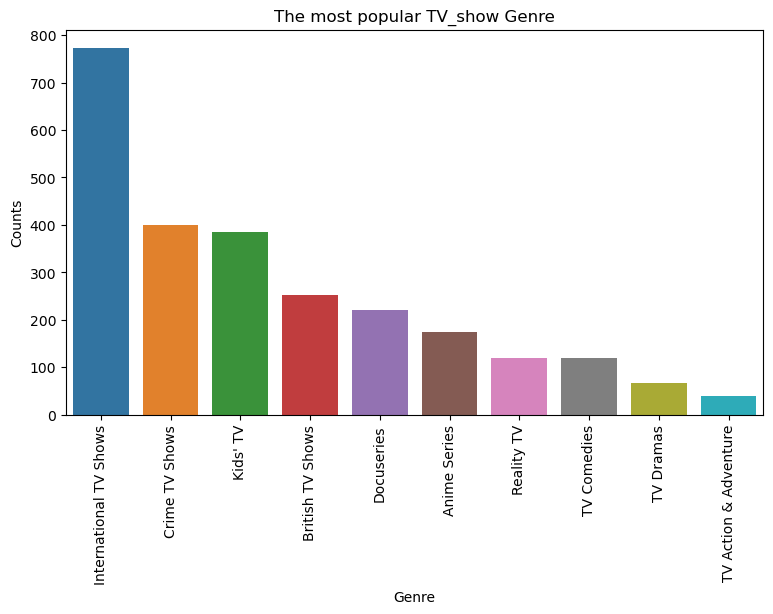

In [100]:
tv_shows["genre"].value_counts()
plt.figure(figsize=(9,5))
sns.countplot(x='genre',data=tv_shows,order=tv_shows['genre'].value_counts().iloc[:10].index)
plt.xticks(rotation=90)
plt.title("The most popular TV_show Genre")
plt.xlabel("Genre")
plt.ylabel('Counts')

Text(0, 0.5, 'Count')

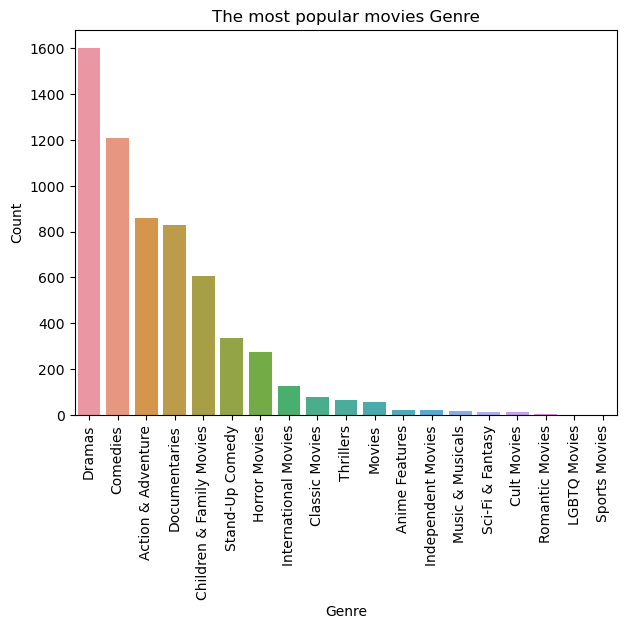

In [113]:
movies["genre"].value_counts()
plt.figure(figsize=(7,5))
sns.countplot(x="genre",data=movies,order=movies['genre'].value_counts().index)
plt.xticks(rotation=90)
plt.title('The most popular movies Genre')
plt.xlabel('Genre')
plt.ylabel('Count')

# 6.List the top 10 directors in the Netflix dataset,considering both TV_shows and movies


Text(0, 0.5, 'Count')

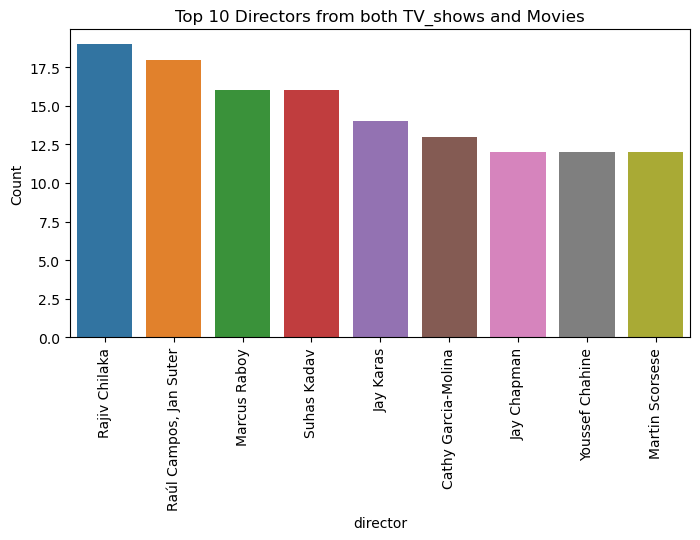

In [115]:

Data['director'].value_counts()
plt.figure(figsize=(8,4))
sns.countplot(x='director',data=Data,order=Data['director'].value_counts().iloc[1:10].index)
plt.xticks(rotation=90)
plt.title("Top 10 Directors from both TV_shows and Movies")
plt.xlabel('director')
plt.ylabel('Count')


# 7.How has the distribution content release changed over the years?


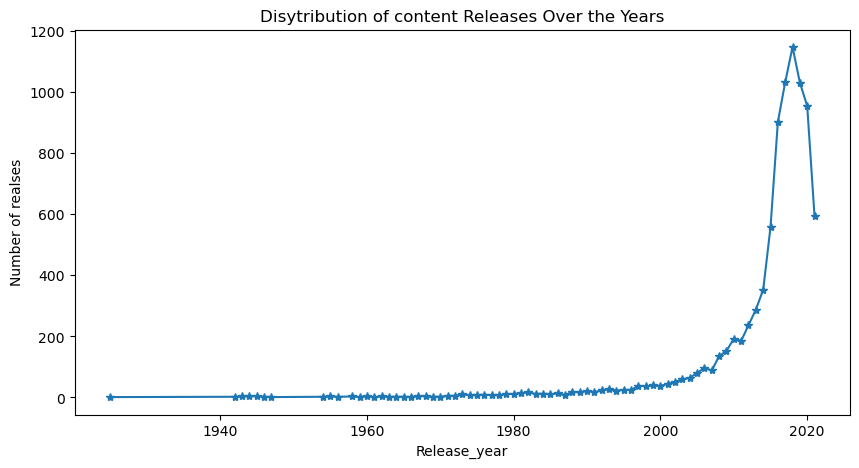

In [118]:
count=Data["release_year"].value_counts().sort_index()
plt.figure(figsize=(10,5))
plt.plot(count.index,count.values,marker="*")
plt.xlabel('Release_year')
plt.ylabel('Number of realses')
plt.title("Disytribution of content Releases Over the Years")
plt.show()